<a href="https://colab.research.google.com/github/srinikha193/Segmentation_Clustering_Exercise/blob/main/Segmentation_Clustering_Exercise.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MAR5806 Clustering Analysis Python Exercise

This example will take data similar to a company's CRM system to create different segments of customers. After developing the segments, you will review some of the segments to determine which ones to target.

## Python Pkgs

##### Install Python Pkgs

In [ ]:
!pip install plotnine

##### Import Python Pkgs
In this block of code you will import certain algorithms or functions used in the code.

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from plotnine import *

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_samples, silhouette_score

import warnings
warnings.filterwarnings("ignore")

##### Mount Google Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


##### Load Data Set

In [ ]:
# load the data
mydata = pd.read_csv("/content/drive/MyDrive/Mall_Customers.csv") # Replace the "WaterBottle.csv" with the new CSV file for your assignment or group project

# Use the 'head' function to print the first 5 rows of the data set
mydata.head()

,CustomerID,Gender,Age,Income,Spending Score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


## Deciding on K, i.e. the "right" number of clusters

How do we select the right number of customers to use in K-Means Clustering? Here is a good article to read about the [method](https://towardsdatascience.com/cheat-sheet-to-implementing-7-methods-for-selecting-optimal-number-of-clusters-in-python-898241e1d6ad).

##### Option 1: Elbow Plot

The first "hack" will get us a graphical representation of the scores. An Elbow Plot shows the the Sum of Squared Error (SSE), which is a statistical measure of how well a model fits the data. It is calculated by summing the squared distance between each observed value and the center of the Cluster. The SSE is always positive and the smaller it is, the better the model.

The "elbow" of the Elbow Plot -- Where the plot stops the steep decline a starts leveling out -- is the optimal k, i.e. the optimal number of clusters. The goal is to choose a small value of k that still has a low SSE, and the elbow usually represents where we start to have diminishing returns by increasing k = the number of clusters.   

##### Option 2: Silhouette Score

A silhouette coefficient of 1 means that the value(s) are far away from other clusters. This is a good thing, because we want our clusters to be seperated. -1 means the values are very close to other clusters, so they be mis-assigned.

+1 = good $\\$
-1 = bad

## Option 1: Create an Elbow Plot:

In [ ]:
# We will standardize all numeric variables, i.e., 'Color', 'Size', 'Brand Name', 'Price', 'Design', 'Sustainability'
scale = StandardScaler()
#rfm_std = scale.fit_transform(mydata[['Color', 'Size', 'Brand Name', 'Price', 'Design', 'Sustainability']])
rfm_std = scale.fit_transform(mydata[['Age','Income','Spending Score']])
#df_std = pd.DataFrame(data = rfm_std, columns = ['Color', 'Size', 'Brand Name', 'Price', 'Design', 'Sustainability'])
df_std = pd.DataFrame(data = rfm_std, columns = ['Age','Income','Spending Score'])
df_std.head()

,Age,Income,Spending Score
0,-1.424569,-1.738999,-0.434801
1,-1.281035,-1.738999,1.195704
2,-1.352802,-1.700830,-1.715913
3,-1.137502,-1.700830,1.040418
4,-0.563369,-1.662660,-0.395980


Execute the Elbow Plot Algorithm

<Axes: >

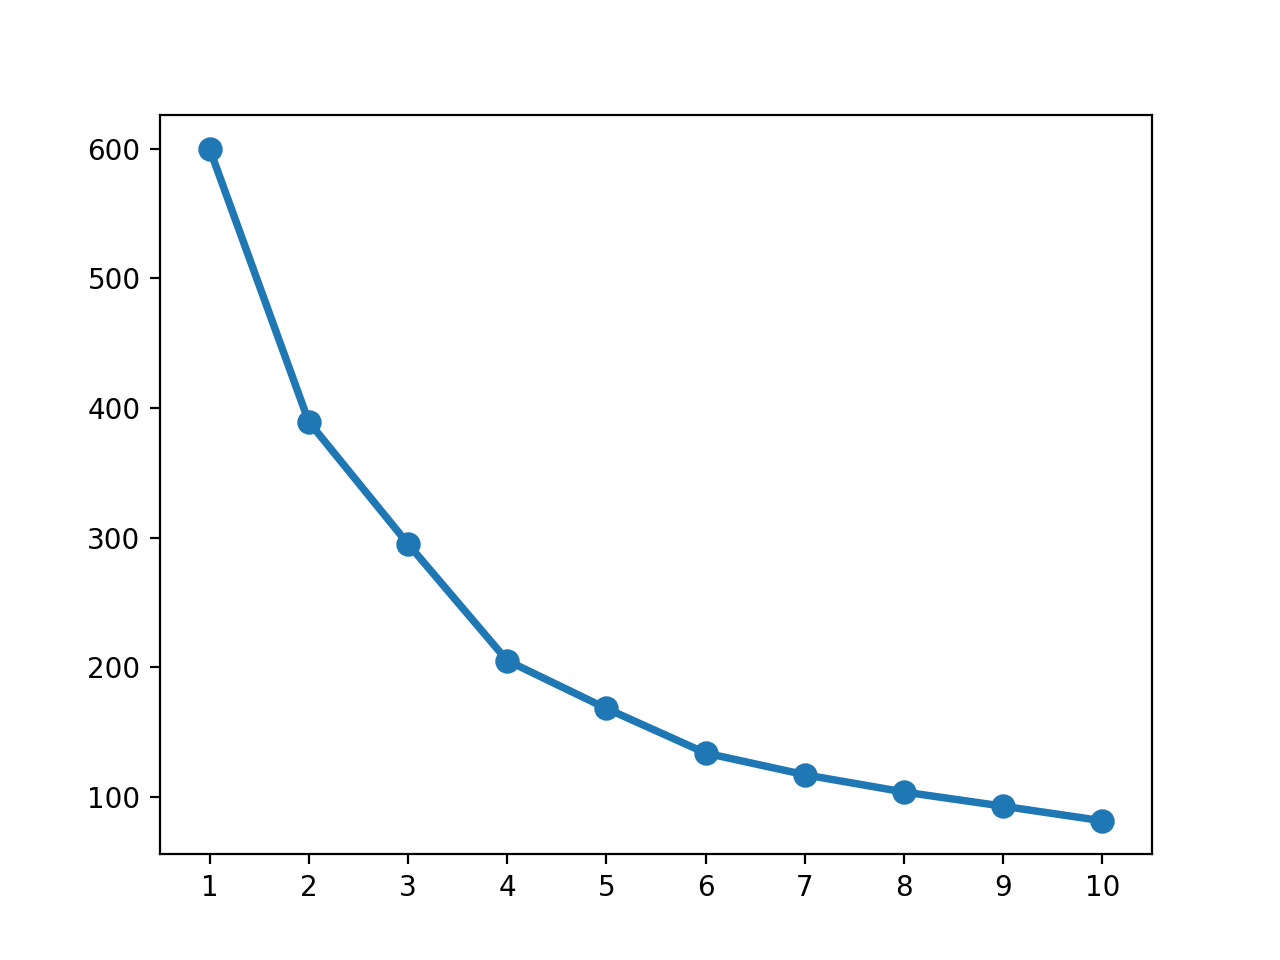

In [ ]:
elbow_sse = {}
for k in range(1, 11):
    km = KMeans(n_clusters=k,
                random_state=1)
    km.fit(df_std)
    elbow_sse[k] = km.inertia_

sns.pointplot(x=list(elbow_sse.keys()), y=list(elbow_sse.values()))

In [ ]:
n_clusters = 10  # Change this to your desired number of clusters
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
kmeans.fit(df_std)  # Use 'data' instead of 'scaled_data' if not standardized
sse_for_each_point = kmeans.inertia_
print(f"SSE for each point in {n_clusters} clusters: {sse_for_each_point}")


SSE for each point in 10 clusters: 82.88526644450903


In [ ]:
n_clusters_range = range(2, 11)
for n_clusters in n_clusters_range:
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    kmeans.fit(df_std)
    sse_for_each_point = kmeans.inertia_
    print(f"SSE for {n_clusters} clusters: {sse_for_each_point}")


SSE for 2 clusters: 389.3861889564371
SSE for 3 clusters: 295.2122461555488
SSE for 4 clusters: 205.22514747675922
SSE for 5 clusters: 168.24758017556837
SSE for 6 clusters: 133.86842085478852
SSE for 7 clusters: 120.43283250037275
SSE for 8 clusters: 103.81525583671635
SSE for 9 clusters: 92.3494576711305
SSE for 10 clusters: 82.88526644450903


### What does the Elbow Plot tell us about the right number of Clusters?
To interpret the Elbow Plot, we look for the inflection point -- where does the slope of the curve start to level off? This is the point where we stop seeing as much of a benefit from grouping customers into an increasing # of clusters.

The ideal number of clusters (k) according to the Elbow Plot = 2

## Option 2: Find the Silhouette score:


In [ ]:
X = rfm_std
# Set the number of clusters. In our case, I will run n from 2 to 9.
range_n_clusters = range(2, 10)

Execute the Silhouette Score Algorithm

In [ ]:
for n_clusters in range_n_clusters:
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)


For n_clusters = 2 The average silhouette_score is : 0.33547192894004574
For n_clusters = 3 The average silhouette_score is : 0.35880977401117803
For n_clusters = 4 The average silhouette_score is : 0.4039582785148566
For n_clusters = 5 The average silhouette_score is : 0.41664341513732767
For n_clusters = 6 The average silhouette_score is : 0.42742814991580175
For n_clusters = 7 The average silhouette_score is : 0.417231894954916
For n_clusters = 8 The average silhouette_score is : 0.408443059554235
For n_clusters = 9 The average silhouette_score is : 0.4188078334648395


What is the ideal number of clusters according to the Silhouette Score? (While this isn't an exact science, we are looking for the largest Silhouette score.)

The Elbow Plot and Silhouette score reveal that X number of clusters might be a good number to use. The code blocks below illustrate the X clusters compared with the 6 numeric variables used to develop them. These plots will enable us to identify potential clusters of interest to target.

The following code creates the exact number of clusters we tell it to, so that we can examine each cluster and determine each Cluster's Color, Size, Brand Name, Price, Design, Sustainability.

In [ ]:
# I have set X = 1 as a placeholder. We need to update this with what we think is the ideal number of clusters.
X = 4

Execute k-Means clustering algorith with X clusters

In [ ]:
kmeans = KMeans(n_clusters=X, random_state=1)
kmeans = kmeans.fit(df_std)
labels = kmeans.predict(df_std) # Identifying Cluster labels

This step will append the cluster assigned by the algorithm as a new column in the dataframe (called 'label').

In [ ]:
mydata['label'] = labels # Adding the label to the original data set
mydata.head()

,CustomerID,Gender,Age,Income,Spending Score,label
0,1,Male,19,15,39,0
1,2,Male,21,15,81,0
2,3,Female,20,16,6,0
3,4,Female,23,16,77,0
4,5,Female,31,17,40,0


## Let's look at the clusters by the 6 input variables used to create the clusters.
We will use a plotting tool that originated in R. The package in R is called ggplot2. The version of this package that is available in Python is called 'plotnine'. One reason to use this package is that it permits boxplots to vary by the number of observations in each of the groups (clusters). The wider the boxplot, the more observations. This capability isn't available in the normal packages used for boxplots in Python. As you look at each plot, which cluster is the most interesting from a business perspective? Why?

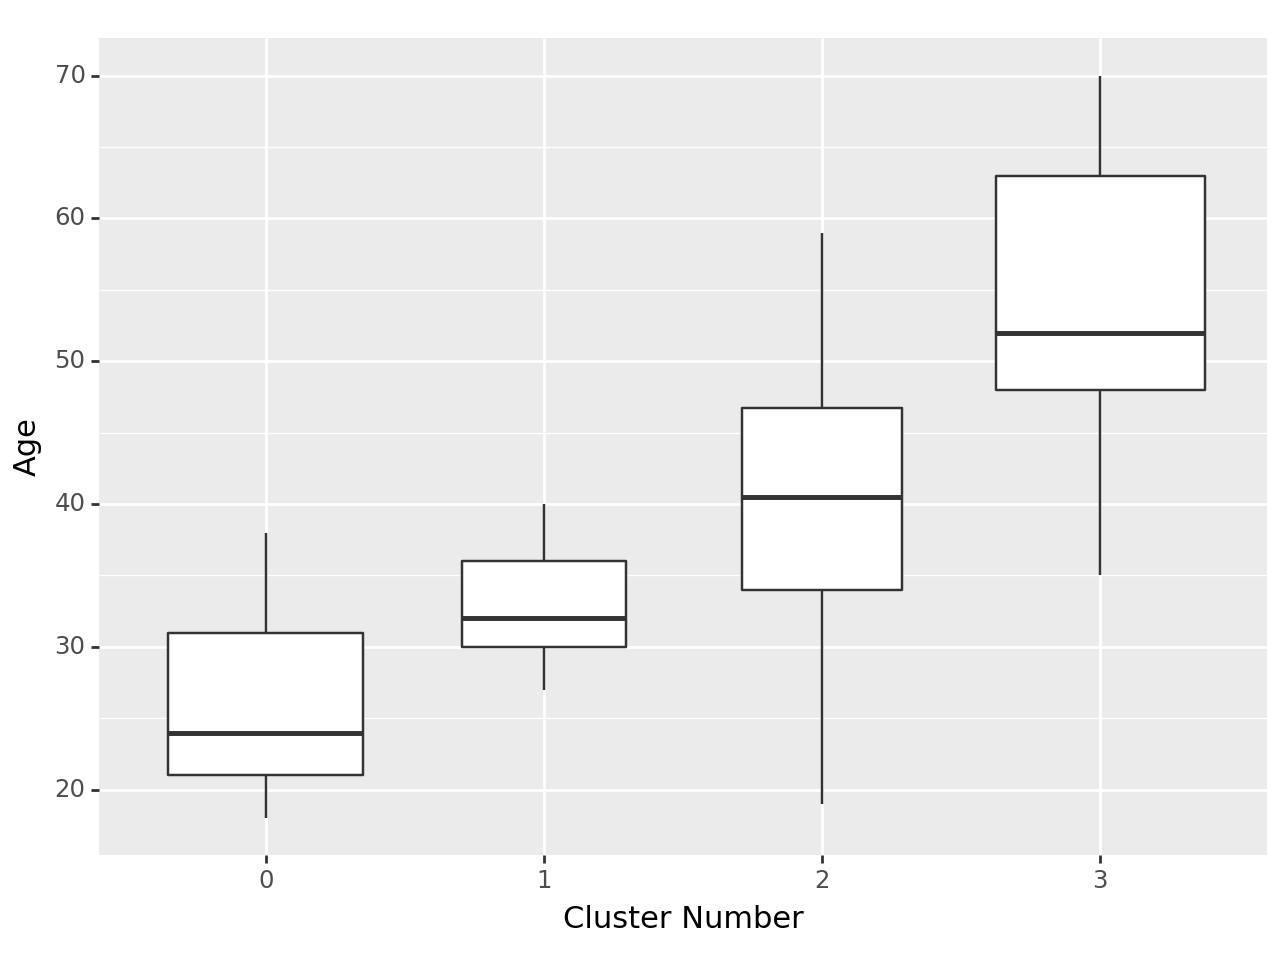

<Figure Size: (640 x 480)>

In [ ]:
(
    ggplot(mydata)
    + geom_boxplot(aes(x='factor(label)', y='Age'),
                  varwidth = True,
                  show_legend = True)
    + labs(x="Cluster Number", y="Age")

)

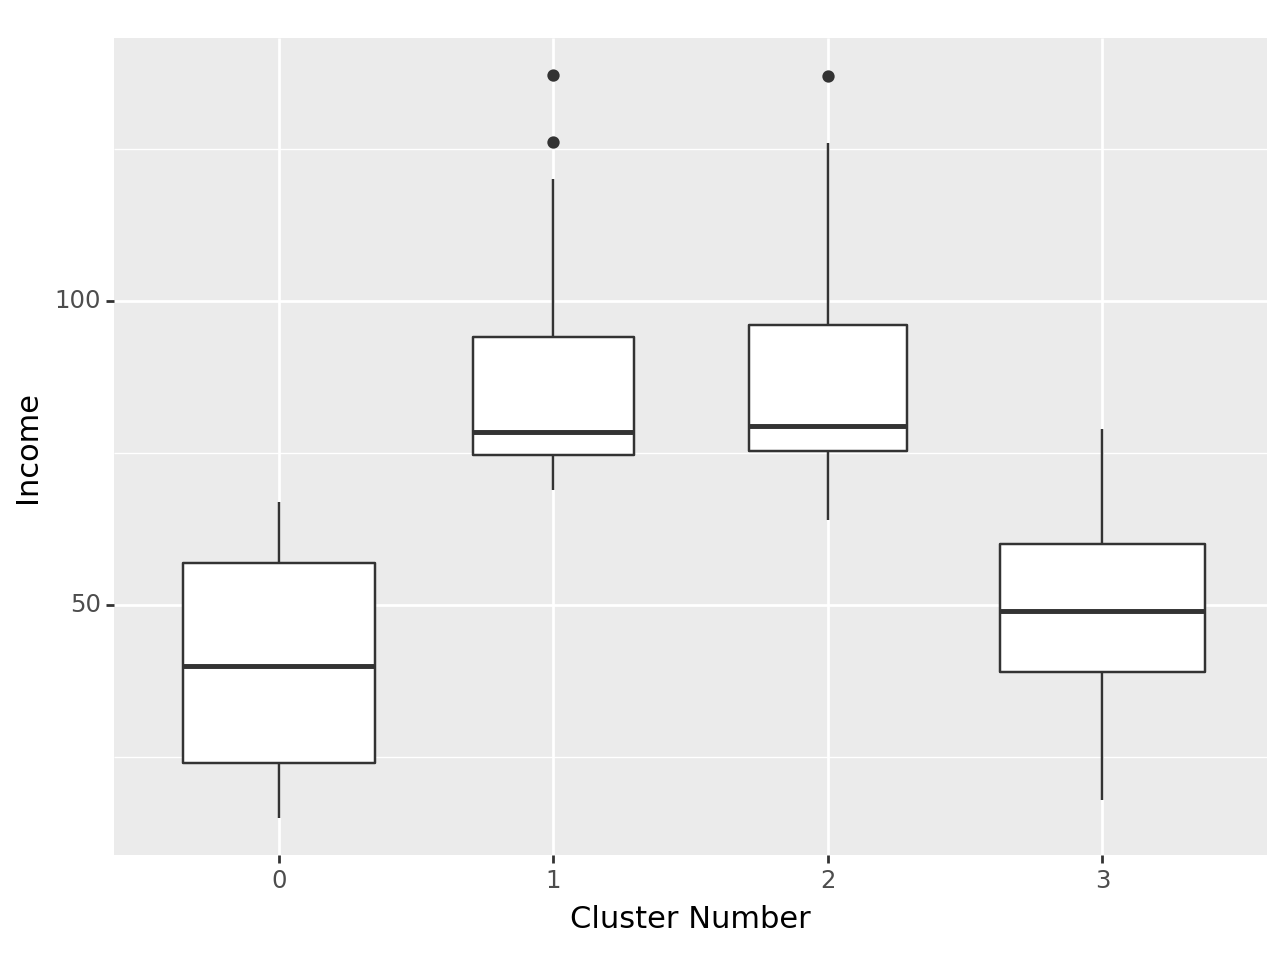

<Figure Size: (640 x 480)>

In [ ]:
(
    ggplot(mydata)
    + geom_boxplot(aes(x='factor(label)', y='Income'),
                  varwidth = True,
                  show_legend = True)
    + labs(x="Cluster Number", y='Income')

)

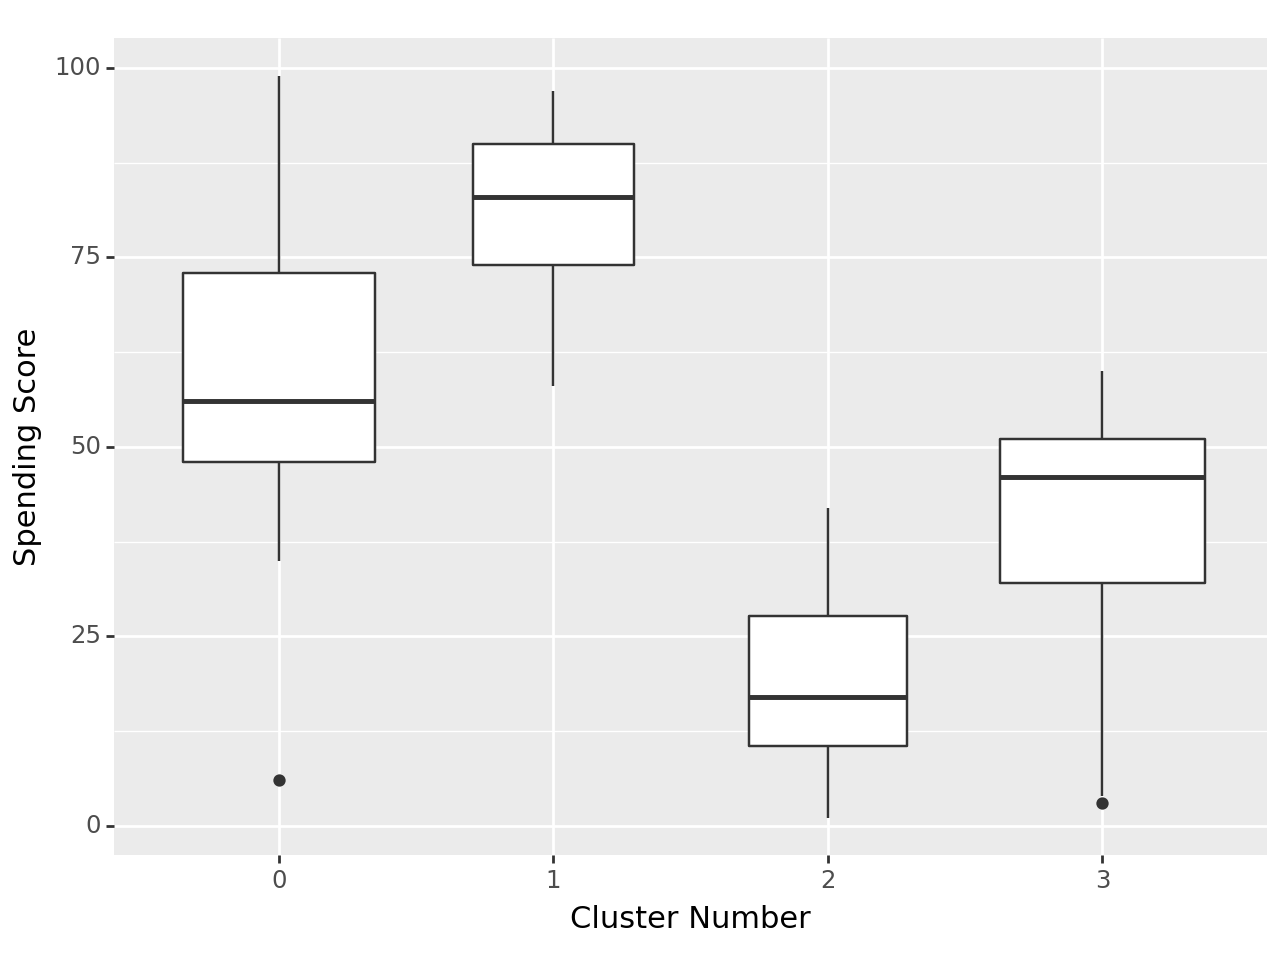

<Figure Size: (640 x 480)>

In [ ]:
(
    ggplot(mydata)
    + geom_boxplot(aes(x='factor(label)', y='Spending Score'),
                  varwidth = True,
                  show_legend = True)
    + labs(x="Cluster Number", y="Spending Score")

)

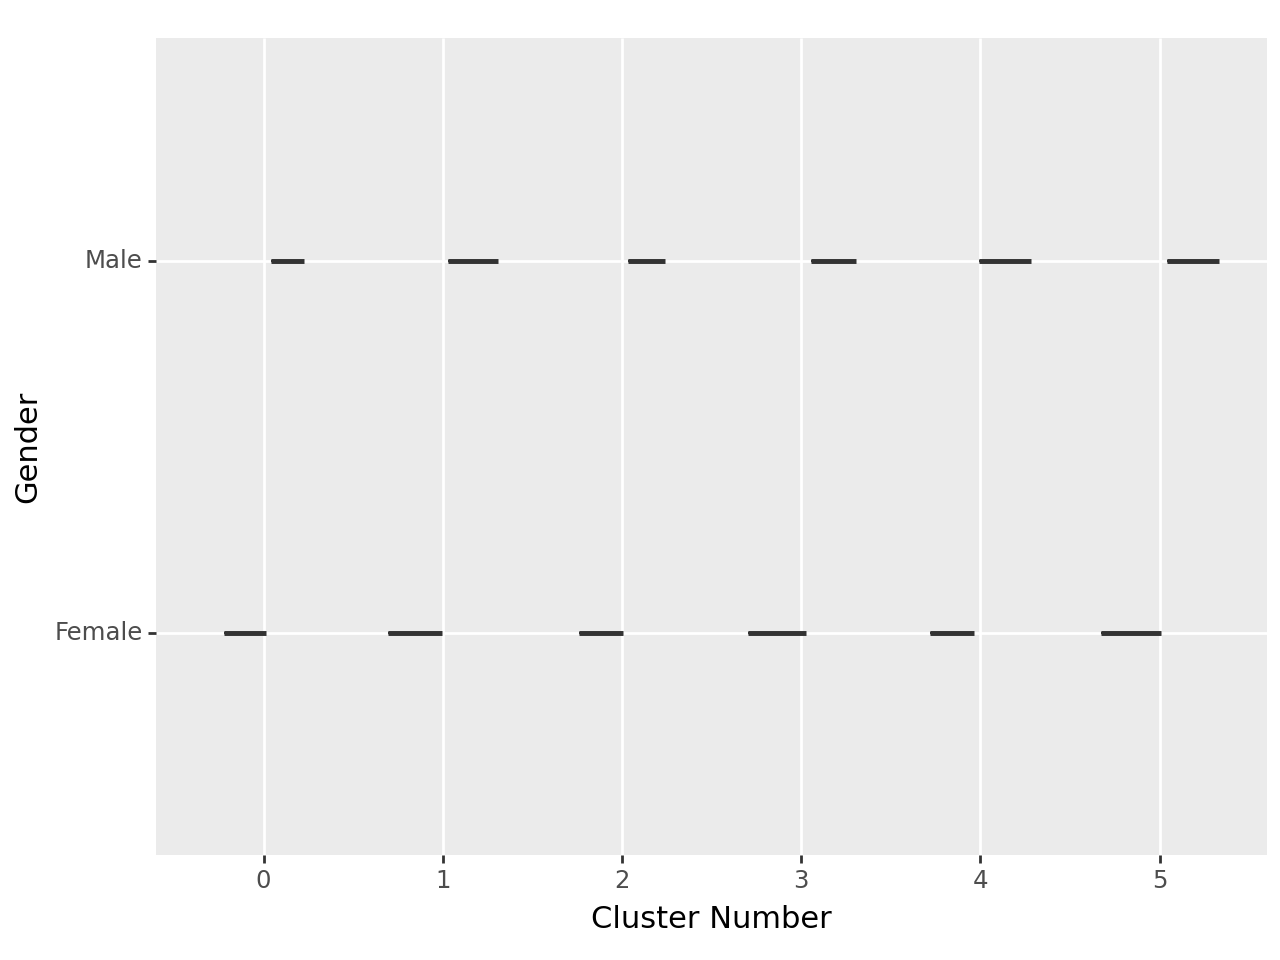

<Figure Size: (640 x 480)>

In [ ]:
(
    ggplot(mydata)
    + geom_boxplot(aes(x='factor(label)', y='Gender'),
                  varwidth = True,
                  show_legend = True)
    + labs(x="Cluster Number", y="Gender")

)

You can also look at the relationship between two variables and cluster label by plotting to scatter plot

<Figure size 800x600 with 0 Axes>

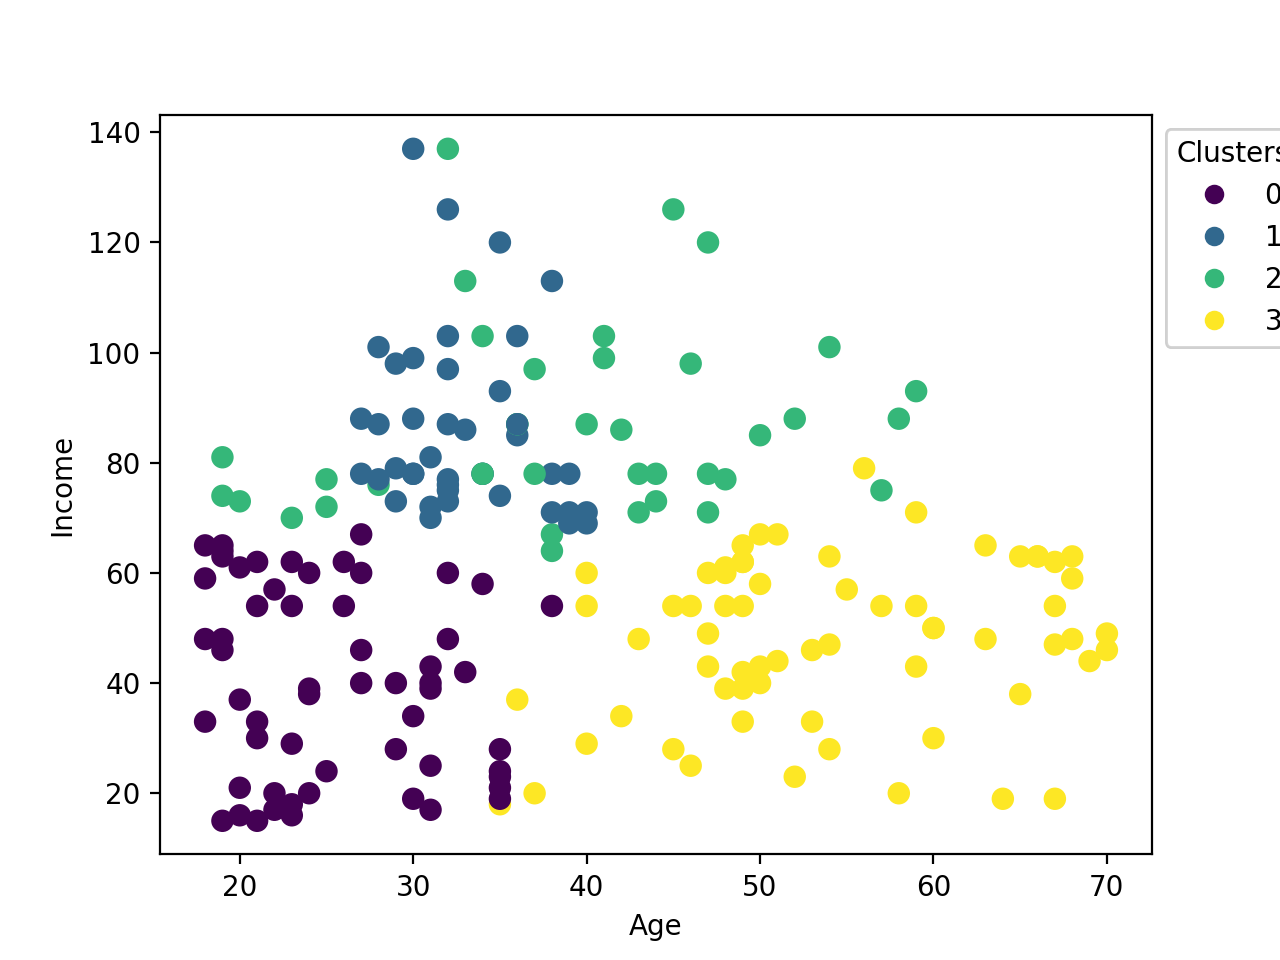

In [ ]:
plt.figure(figsize=(8, 6)) # Make the plot larger
fig, ax = plt.subplots()
scatter = ax.scatter(mydata["Age"], mydata["Income"], c = labels, s=50, cmap='viridis') # Scatter plot with 'Design' and 'Sustainability' variables
# Label x and y axes
plt.xlabel("Age")
plt.ylabel("Income")
# Add legend
legend1 = ax.legend(*scatter.legend_elements(), bbox_to_anchor=(1.00, 1), loc="upper left", title="Clusters")
ax.add_artist(legend1)
plt.show()

Plot a barplot of a categorical variable, e.g., Gender per cluster

In [ ]:
mydata['label'] = mydata.label.astype('category')
proportion = pd.DataFrame(mydata.groupby(["Gender", "label"]).size()).reset_index()
proportion.columns = ['Gender', 'label', 'count']
proportion['%'] = 100 * proportion['count'] / proportion.groupby('label')['count'].transform('sum')

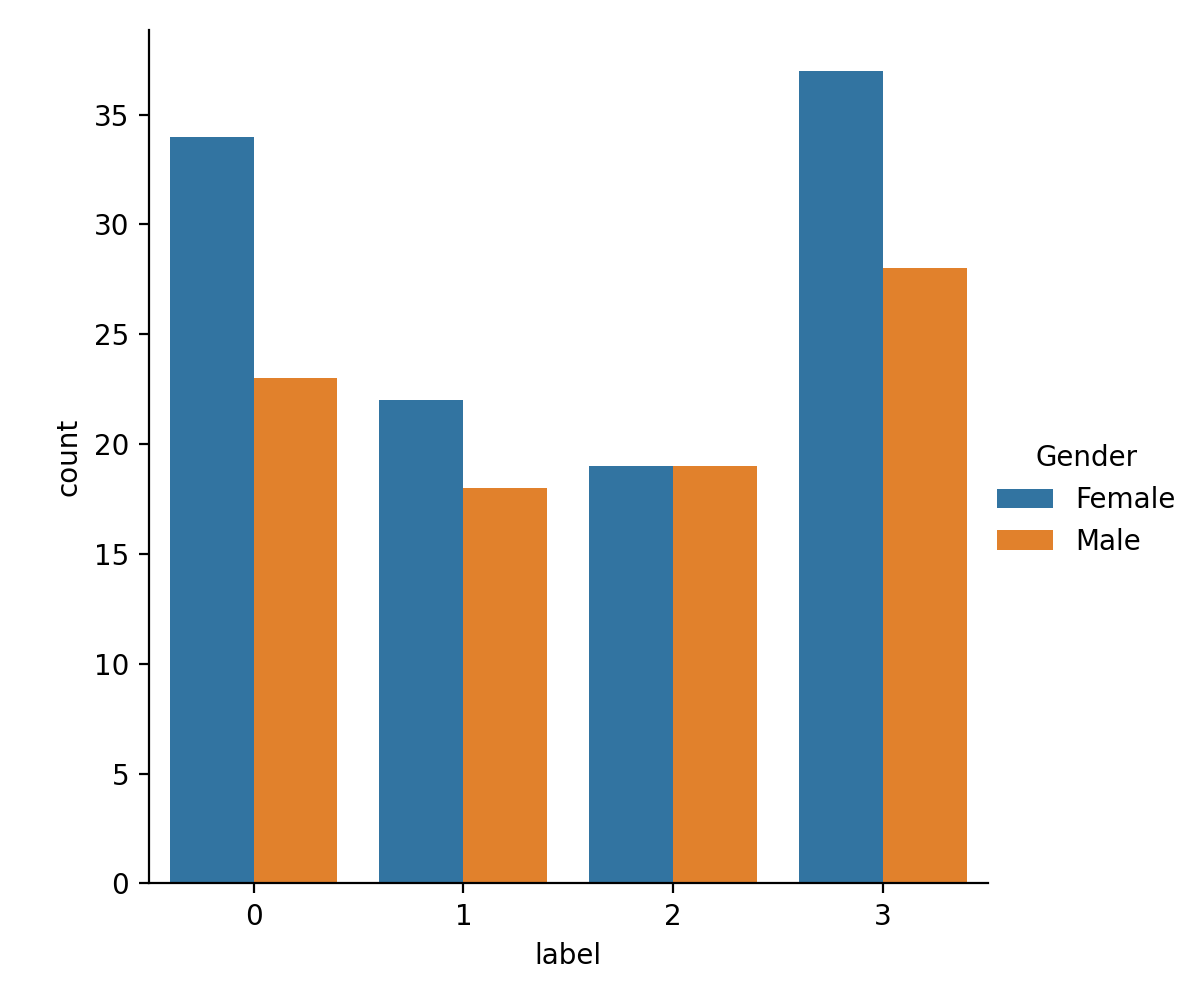

In [ ]:
sns.catplot(x = 'label', y = 'count', hue = 'Gender', data=proportion, kind='bar')

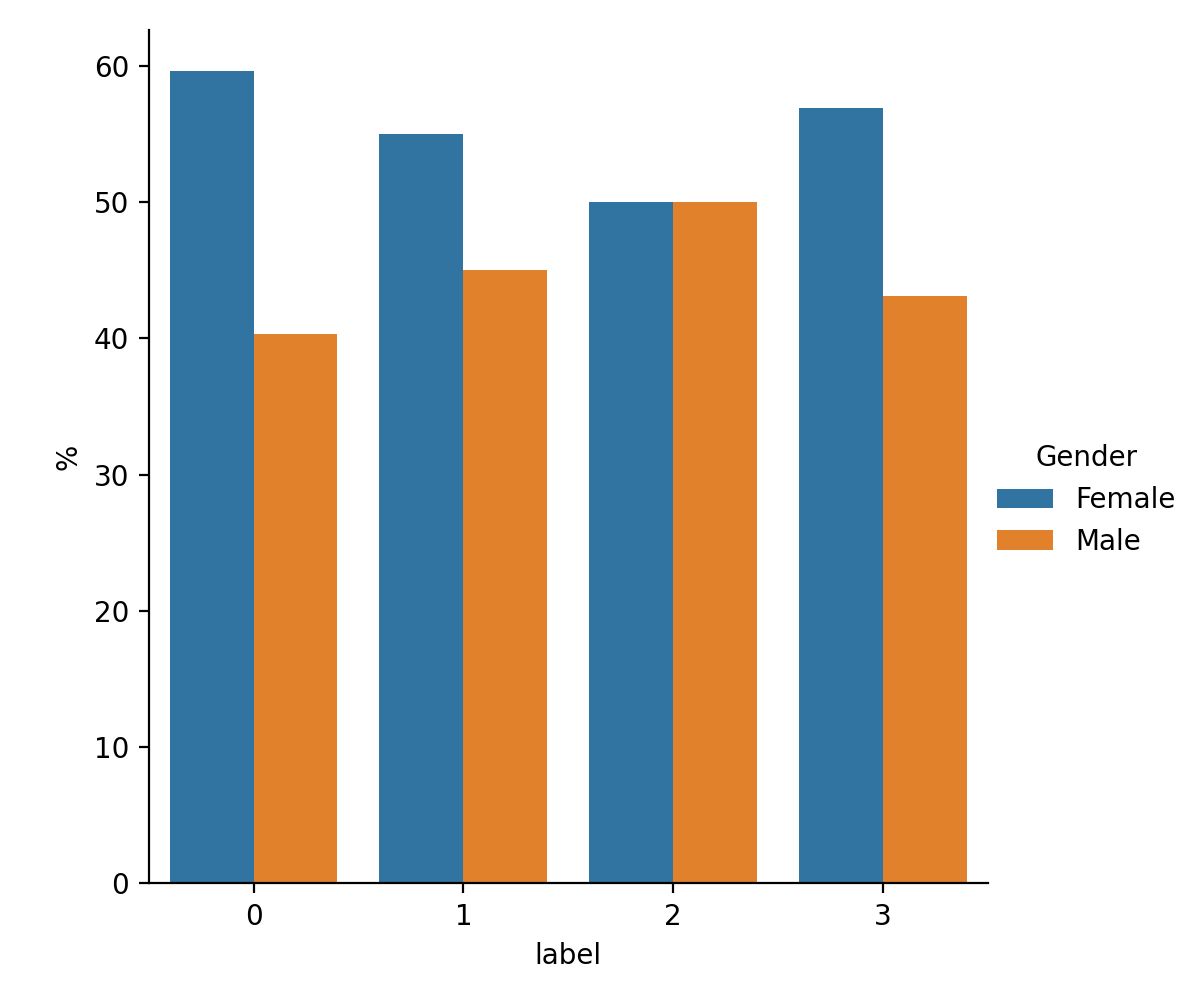

In [ ]:
# Percentage per cluster may provide more information
sns.catplot(x = 'label', y = '%', hue = 'Gender', data=proportion, kind='bar')

## Interpret the Outputs

What is your interpretation? Which cluster would you recommend to the business? Why?

Save this Notebook and now begin to work on creating a [Customer Persona](https://userpersona.dev/) for your Target Segment of Choice.